In [1]:
from tensorflow.keras.layers import LSTM,Input,RepeatVector,TimeDistributed,Dense,Embedding
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

2025-12-27 11:54:23.921417: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-27 11:54:23.921713: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-27 11:54:23.962475: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-27 11:54:24.985123: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To tur

In [2]:
with open ("df.txt","r") as f:
    text=f.read().split(".")
print(text)

['AI redirects here', ' For other uses, see AI (disambiguation) and Artificial intelligence (disambiguation)', '\n\nArtificial intelligence (AI) is the capability of computational systems to perform tasks typically associated with human intelligence, such as learning, reasoning, problem-solving, perception, and decision-making', ' It is a field of research in computer science that develops and studies methods and software that enable machines to perceive their environment and use learning and intelligence to take actions that maximize their chances of achieving defined goals', '\n\nHigh-profile applications of AI include advanced web search engines (e', 'g', ', Google Search); recommendation systems (used by YouTube, Amazon, and Netflix); virtual assistants (e', 'g', ', Google Assistant, Siri, and Alexa); autonomous vehicles (e', 'g', ', Waymo); generative and creative tools (e', 'g', ', language models and AI art); and superhuman play and analysis in strategy games (e', 'g', ', chess 

In [3]:
token=Tokenizer()
token.fit_on_texts(text)

In [4]:
sequence=token.texts_to_sequences(text)
sequence

[[2, 60, 61],
 [21, 22, 62, 63, 2, 23, 1, 8, 7, 23],
 [8,
  7,
  2,
  24,
  4,
  64,
  3,
  65,
  25,
  5,
  66,
  67,
  68,
  69,
  26,
  27,
  7,
  28,
  6,
  13,
  29,
  70,
  71,
  30,
  1,
  72,
  73],
 [74,
  24,
  9,
  31,
  3,
  14,
  10,
  75,
  76,
  15,
  77,
  1,
  78,
  32,
  1,
  79,
  15,
  80,
  81,
  5,
  82,
  33,
  83,
  1,
  34,
  13,
  1,
  7,
  5,
  84,
  85,
  15,
  86,
  33,
  87,
  3,
  88,
  89,
  16],
 [90, 91, 17, 3, 2, 35, 36, 92, 18, 93, 11],
 [12],
 [19, 18, 94, 25, 37, 38, 95, 96, 1, 97, 98, 99, 11],
 [12],
 [19, 100, 101, 1, 102, 103, 104, 11],
 [12],
 [105, 20, 1, 106, 39, 11],
 [12],
 [40, 107, 1, 2, 108, 1, 109, 110, 1, 111, 10, 112, 113, 11],
 [12],
 [114, 1, 115],
 [116,
  117,
  2,
  17,
  41,
  42,
  118,
  6,
  2,
  9,
  119,
  3,
  120,
  121,
  2,
  43,
  122,
  123,
  44,
  17,
  124,
  125,
  45,
  126,
  2,
  127,
  128,
  129,
  130,
  131,
  46,
  1,
  132,
  46,
  133,
  42,
  134,
  2,
  135],
 [136, 137, 3, 2, 14, 41, 138, 139, 47, 16,

In [5]:
max_len = max(len(seq) for seq in sequence)
max_len

39

In [6]:
sequences=pad_sequences(sequence,padding="post",maxlen=max_len)
sequences

array([[  2,  60,  61, ...,   0,   0,   0],
       [ 21,  22,  62, ...,   0,   0,   0],
       [  8,   7,   2, ...,   0,   0,   0],
       ...,
       [ 20,  58, 233, ...,   0,   0,   0],
       [241, 242,  49, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], shape=(28, 39), dtype=int32)

In [7]:
vocab_size = len(token.word_index) + 1
vocab_size

259

In [8]:
x = sequences
x

array([[  2,  60,  61, ...,   0,   0,   0],
       [ 21,  22,  62, ...,   0,   0,   0],
       [  8,   7,   2, ...,   0,   0,   0],
       ...,
       [ 20,  58, 233, ...,   0,   0,   0],
       [241, 242,  49, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], shape=(28, 39), dtype=int32)

In [9]:
encoder = Sequential([
    Input(shape=(max_len,)),
    Embedding(input_dim=vocab_size, output_dim=64, mask_zero=True),
    LSTM(100, return_sequences=True),
    LSTM(30)
])

E0000 00:00:1766832866.162457   37303 cuda_executor.cc:1309] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1766832866.168173   37303 gpu_device.cc:2342] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [10]:
decoder = Sequential([
    Input(shape=(30,)),
    RepeatVector(max_len),
    LSTM(100, return_sequences=True),
    TimeDistributed(Dense(vocab_size, activation="softmax"))
])


In [11]:
autoencoder=Sequential([
    encoder,
    decoder
])

In [12]:
autoencoder.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy"
)

In [ ]:
autoencoder.fit(x,x,epochs=1000,batch_size=16)

Epoch 1/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 1.4557
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 1.4481
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 1.4384
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 1.4374
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 1.4609
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 1.4458
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 1.4364
Epoch 8/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 1.4340
Epoch 9/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 1.4325
Epoch 10/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 1.4324
Epoch 11/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 1.4204
Epoch 12/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 1.4328
Epoch 13/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 1.4317
Epoch 14/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 1.4637
Epoch 15/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 1.4491
Epoc

In [14]:
pred = autoencoder.predict(x)
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


array([[[8.7372763e-03, 6.4208917e-03, 6.5275547e-03, ...,
         3.8084779e-03, 3.6465998e-03, 3.8784603e-03],
        [2.7854234e-02, 1.1660650e-02, 1.0988501e-02, ...,
         3.8566394e-03, 3.5439855e-03, 4.0240292e-03],
        [1.3433808e-01, 2.2702968e-02, 1.7343406e-02, ...,
         3.6501240e-03, 3.2854674e-03, 3.8894631e-03],
        ...,
        [9.7676408e-01, 3.3238141e-03, 8.5791928e-04, ...,
         1.0650313e-04, 9.7832453e-05, 1.0591475e-04],
        [9.7676408e-01, 3.3238046e-03, 8.5791724e-04, ...,
         1.0650283e-04, 9.7832075e-05, 1.0591444e-04],
        [9.7676426e-01, 3.3237939e-03, 8.5791457e-04, ...,
         1.0650254e-04, 9.7831726e-05, 1.0591416e-04]],

       [[5.0664824e-03, 5.1282281e-03, 5.8889259e-03, ...,
         3.4948713e-03, 3.4614536e-03, 3.7212973e-03],
        [6.6392552e-03, 6.4007142e-03, 7.9985922e-03, ...,
         3.2575924e-03, 3.2089534e-03, 3.6745346e-03],
        [9.2895599e-03, 8.1775337e-03, 1.0699200e-02, ...,
         3.085

In [15]:
pred_ids = pred.argmax(axis=-1)
pred_ids

array([[0, 0, 0, ..., 0, 0, 0],
       [2, 2, 2, ..., 0, 0, 0],
       [2, 2, 2, ..., 0, 0, 0],
       ...,
       [2, 2, 2, ..., 0, 0, 0],
       [2, 2, 2, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(28, 39))

In [16]:
index_word = {v: k for k, v in token.word_index.items()}
index_word[0] = "<PAD>"
index_word

{1: 'and',
 2: 'ai',
 3: 'of',
 4: 'the',
 5: 'to',
 6: 'as',
 7: 'intelligence',
 8: 'artificial',
 9: 'a',
 10: 'in',
 11: 'e',
 12: 'g',
 13: 'learning',
 14: 'research',
 15: 'that',
 16: 'goals',
 17: 'applications',
 18: 'search',
 19: 'google',
 20: 'generative',
 21: 'for',
 22: 'other',
 23: 'disambiguation',
 24: 'is',
 25: 'systems',
 26: 'with',
 27: 'human',
 28: 'such',
 29: 'reasoning',
 30: 'perception',
 31: 'field',
 32: 'methods',
 33: 'their',
 34: 'use',
 35: 'include',
 36: 'advanced',
 37: 'used',
 38: 'by',
 39: 'tools',
 40: 'language',
 41: 'are',
 42: 'not',
 43: 'has',
 44: 'general',
 45: 'being',
 46: 'enough',
 47: 'particular',
 48: 'processing',
 49: 'have',
 50: 'techniques',
 51: 'neural',
 52: 'networks',
 53: 'create',
 54: 'an',
 55: 'funding',
 56: 'known',
 57: 'after',
 58: "ai's",
 59: 'about',
 60: 'redirects',
 61: 'here',
 62: 'uses',
 63: 'see',
 64: 'capability',
 65: 'computational',
 66: 'perform',
 67: 'tasks',
 68: 'typically',
 69: 'a

In [17]:
def decode_sequence(seq):
    words = []
    for idx in seq:
        if idx == 0:
            continue
        words.append(index_word.get(idx, "?"))
    return " ".join(words)


In [18]:
compression = encoder.predict(x)
compression.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


(28, 30)

In [19]:
n =1

real_sentence = decode_sequence(x[n])
reconstructed_sentence = decode_sequence(pred_ids[n])

print("REAL:        ", real_sentence)
print("---------------------------------------------------------------------------------------------------------------------------------")
print("RECONSTRUCT: ", reconstructed_sentence)


REAL:         for other uses see ai disambiguation and artificial intelligence disambiguation
---------------------------------------------------------------------------------------------------------------------------------
RECONSTRUCT:  ai ai ai ai


### combine recurrent-autoencoder with pca for dimention reducing and visualisation

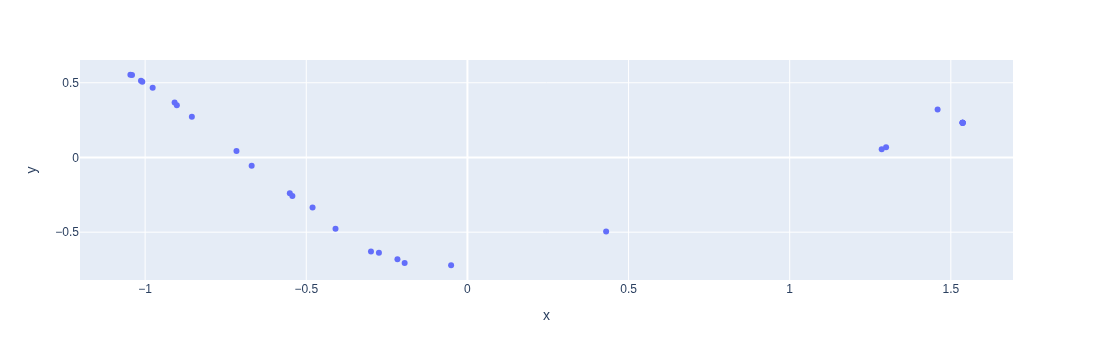

In [20]:
pca=PCA()
compression_2D=pca.fit_transform(compression)
df = pd.DataFrame({
    "x": compression_2D[:,0],
    "y": compression_2D[:,1],
    "sentence": text
})

fig = px.scatter(df, x="x", y="y", hover_data=["sentence"])
fig.show()

plt.show()